### sklearn Classification 

- Dataset: iris.csv
- Learning Date: 14-Oct-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

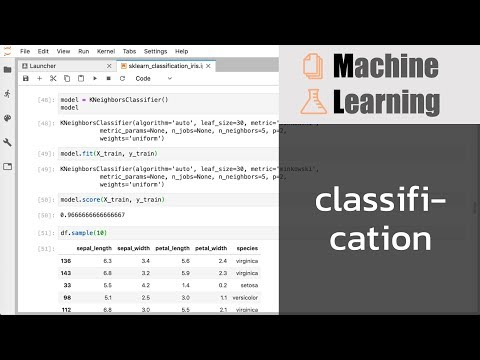

In [15]:
# load Video

from IPython.display import YouTubeVideo

YouTubeVideo('n2b_0GTN91Q', width = 720, height = 405)

In [16]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [17]:
# read data from a csv file on Aj. Prasert's github to a dataframe

df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
39,5.1,3.4,1.5,0.2,setosa
91,6.1,3.0,4.6,1.4,versicolor
17,5.1,3.5,1.4,0.3,setosa
129,7.2,3.0,5.8,1.6,virginica
48,5.3,3.7,1.5,0.2,setosa
16,5.4,3.9,1.3,0.4,setosa
124,6.7,3.3,5.7,2.1,virginica
131,7.9,3.8,6.4,2.0,virginica
43,5.0,3.5,1.6,0.6,setosa


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.shape

(150, 5)

In [20]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [21]:
df.groupby('species')

In [22]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [23]:
df.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [24]:
df.groupby('species').min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [25]:
# count number of each species

df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

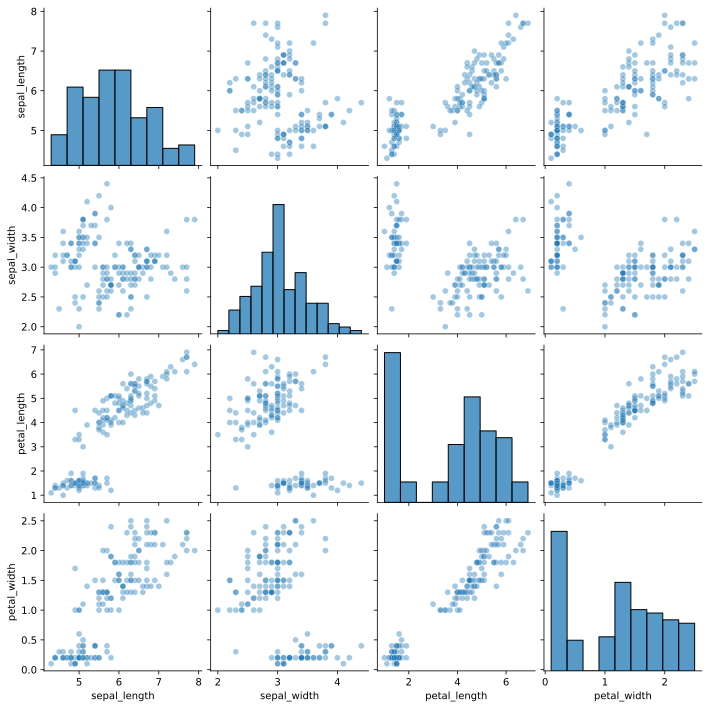

In [26]:
# plot

sns.pairplot(data = df, vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], markers = ['+'], plot_kws = {'alpha': 0.4})

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/seaborn/axisgrid.py:1609: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an unint

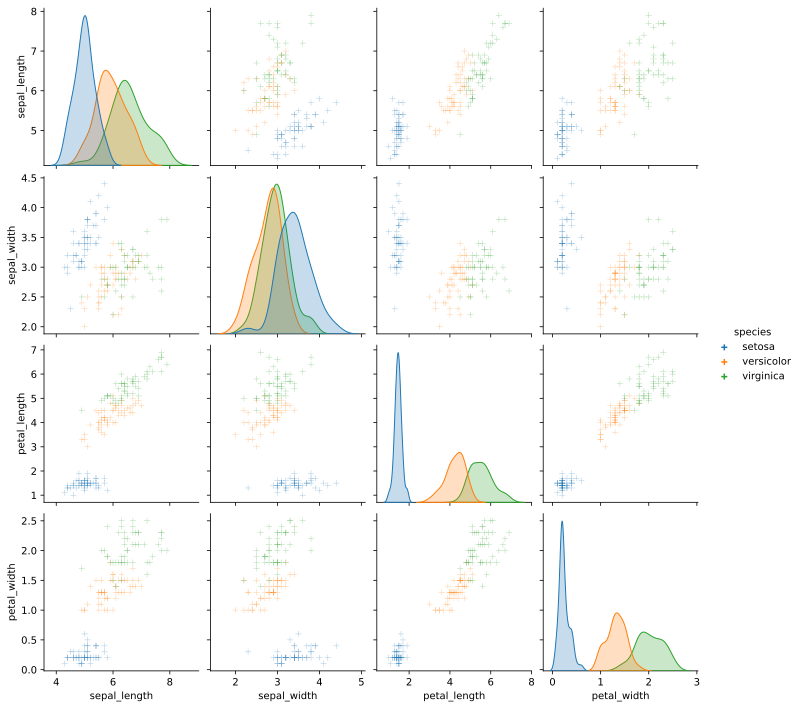

In [27]:
# plot

sns.pairplot(data = df, vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], hue = 'species', markers = ['+'], plot_kws = {'alpha': 0.4})

### Scikit-learn: KNeighborsClassifier

In [28]:
# import libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [31]:
species_dict = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species_code'] = df['species'].map(species_dict)
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,species_code
120,6.9,3.2,5.7,2.3,virginica,2
121,5.6,2.8,4.9,2.0,virginica,2
10,5.4,3.7,1.5,0.2,setosa,0
9,4.9,3.1,1.5,0.1,setosa,0
143,6.8,3.2,5.9,2.3,virginica,2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_code  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
df.species_code.value_counts()

0    50
1    50
2    50
Name: species_code, dtype: int64

In [34]:
# use all data for training

X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = df.species
y_train = df.species_code

In [35]:
X_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [36]:
y_train.head(3)

0    0
1    0
2    0
Name: species_code, dtype: int64

### work a model

In [37]:
model = KNeighborsClassifier(n_neighbors = 5) # create a mode
model

KNeighborsClassifier()

In [38]:
model.fit(X_train, y_train) # fit/train a model

KNeighborsClassifier()

In [39]:
model.score(X_train, y_train) # get a score from training set

0.9666666666666667

In [40]:
# predict

model.predict([[3, 4, 5, 6]])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2])

In [41]:
model.predict([[3, 4, 5, 6], [3, 4, 5, 2], [5, 3.5, 1.5, 0.2]])

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2, 1, 0])

In [42]:
df.groupby('species_code').mean()

/var/folders/0z/2gy2pkss67v3rwygb64_tfvm0000gn/T/ipykernel_16775/2167246836.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('species_code').mean()


,sepal_length,sepal_width,petal_length,petal_width
species_code,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026
